In [2]:
from models import FashionMNISTCNN

model = FashionMNISTCNN(hidden_layers=[256, 128], freeze_cnn=True)


In [3]:
model

FashionMNISTCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_layers): ModuleList(
    (0): Linear(in_features=3136, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
  )
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)

In [4]:
from scripts import FashionMNISTCSV
from torch.utils.data import DataLoader

batch_size = 64
learning_rate = 0.001
epochs = 10

train_csv_path = "data/FashionMNIST/fashion-mnist_train.csv"
test_csv_path = "data/FashionMNIST/fashion-mnist_test.csv"

train_dataset = FashionMNISTCSV(train_csv_path)
test_dataset = FashionMNISTCSV(test_csv_path)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
from scripts import train_model 
train_model(model, train_loader, criterion, optimizer, epochs)

Epoch 1/10, Loss: 0.5818407252144966
Epoch 2/10, Loss: 0.38199831138668794
Epoch 3/10, Loss: 0.3348698742481183
Epoch 4/10, Loss: 0.30904111037376336
Epoch 5/10, Loss: 0.28983862142858985
Epoch 6/10, Loss: 0.2758338615727196
Epoch 7/10, Loss: 0.26758155997977584
Epoch 8/10, Loss: 0.2561254824267458
Epoch 9/10, Loss: 0.2474704217086278
Epoch 10/10, Loss: 0.23982090764700859


In [9]:
from scripts import evaluate_model

In [27]:
%load_ext autoreload
%autoreload 2


a
[[770  10   7  15   1   0 191   0   6   0]
 [  2 996   0   2   0   0   0   0   0   0]
 [  9   2 759   8 123   0  97   0   2   0]
 [ 16  34   4 872  52   0  19   0   3   0]
 [  1   4  27  10 913   0  45   0   0   0]
 [  0   1   0   0   0 955   1  33   1   9]
 [ 67   7  31  18  71   0 801   0   5   0]
 [  0   0   0   0   0   3   0 980   0  17]
 [  1   3   3   0   2   1   4   1 984   1]
 [  0   0   0   0   0   2   0  48   1 949]]
Test Accuracy: 89.79%


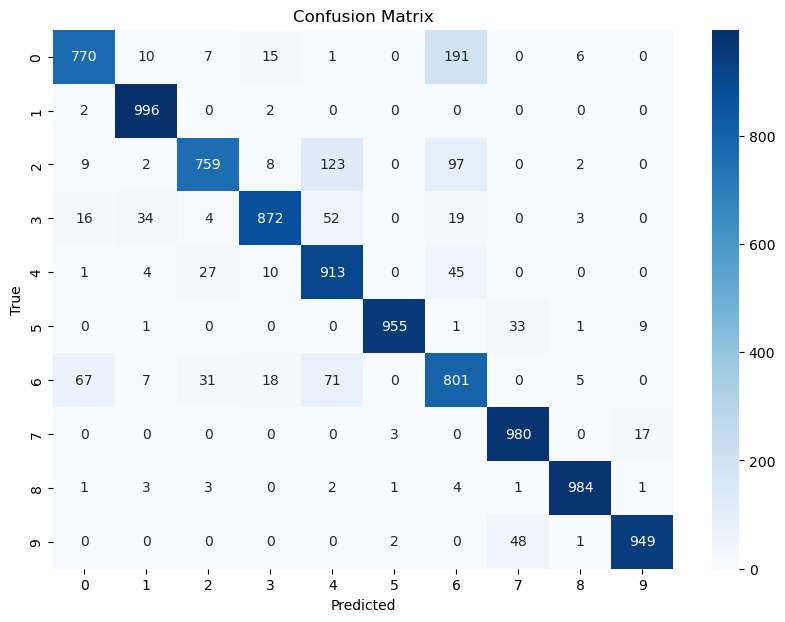

[[770  10   7  15   1   0 191   0   6   0]
 [  2 996   0   2   0   0   0   0   0   0]
 [  9   2 759   8 123   0  97   0   2   0]
 [ 16  34   4 872  52   0  19   0   3   0]
 [  1   4  27  10 913   0  45   0   0   0]
 [  0   1   0   0   0 955   1  33   1   9]
 [ 67   7  31  18  71   0 801   0   5   0]
 [  0   0   0   0   0   3   0 980   0  17]
 [  1   3   3   0   2   1   4   1 984   1]
 [  0   0   0   0   0   2   0  48   1 949]]


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(evaluate_model(model, test_loader, device))